In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("humidity boxplot outlier.csv")
data.head()

,Unnamed: 0,lat,lon,pressure,temperature,humidity
0,1,42.663,23.273,94355.83,23.06,59.46
1,2,42.700,23.360,95155.81,26.53,44.38
2,3,42.624,23.406,94679.57,28.34,38.28
3,4,42.669,23.318,94327.88,26.31,46.37
4,5,42.709,23.398,95314.52,22.66,56.55


In [3]:
data1 = data.drop(["Unnamed: 0"], axis = 1)
data1.head()

,lat,lon,pressure,temperature,humidity
0,42.663,23.273,94355.83,23.06,59.46
1,42.700,23.360,95155.81,26.53,44.38
2,42.624,23.406,94679.57,28.34,38.28
3,42.669,23.318,94327.88,26.31,46.37
4,42.709,23.398,95314.52,22.66,56.55


In [4]:
data2=data1.iloc[:500,]
data2.head()

,lat,lon,pressure,temperature,humidity
0,42.663,23.273,94355.83,23.06,59.46
1,42.700,23.360,95155.81,26.53,44.38
2,42.624,23.406,94679.57,28.34,38.28
3,42.669,23.318,94327.88,26.31,46.37
4,42.709,23.398,95314.52,22.66,56.55


In [5]:
def plot(data):
    for i in range(0,(len(data.columns))-1):
        print("plot between",data.columns[i],"and",data.columns[4])
        for j in range(0,(len(data.columns))-1):
            if(j==i+1):
                x=data.iloc[:,i:j]
                y=data.iloc[:,4:5]
        plt.figure()
        plt.plot(x,y)
        plt.show()

plot between lat and humidity


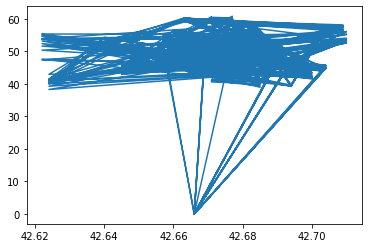

plot between lon and humidity


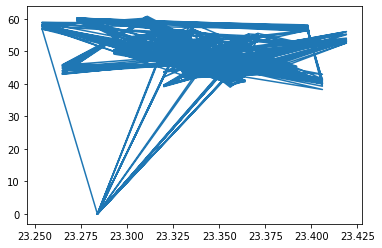

plot between pressure and humidity


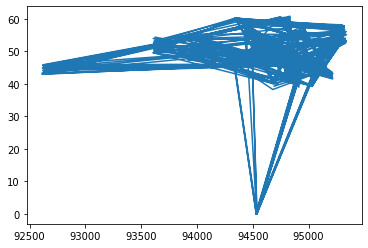

plot between temperature and humidity


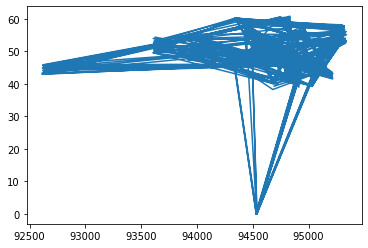

In [6]:
plot(data2)

In [7]:
data3 = data1.drop(["lat", "lon"], axis = 1)
data3.head()

,pressure,temperature,humidity
0,94355.83,23.06,59.46
1,95155.81,26.53,44.38
2,94679.57,28.34,38.28
3,94327.88,26.31,46.37
4,95314.52,22.66,56.55


In [8]:
data3.shape

(669507, 3)

In [9]:
x1=data3.iloc[:,0:1]
x2=data3.iloc[:,1:2]
x=data3.iloc[:,:-1]
y=data3.iloc[:,2:3]

# linear model

In [10]:
def lr_model(i,o):
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    lr.fit(i,o)
    y_pred=lr.predict(i)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(o,y_pred))
    print(rmse)
    print(r2_score(o,y_pred))

In [11]:
# pressure and humidity
lr_model(x1,y)

20.68129928245171
0.021204273442529176


In [12]:
#temperature and humidity
lr_model(x2,y)

18.07450934602689
0.252399713552408


In [13]:
#pressure,temperature and humidity
lr_model(x,y)

17.77204345869819
0.27721162513466147


# linear model after splitting 

In [14]:
def lr_split_model(i,o):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(i,o,test_size = 0.20, random_state =0)
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(rmse)
    print(r2_score(y_test,y_pred))
    

In [15]:
# pressure and humidity
lr_split_model(x1,y)

20.68008539533273
0.022266113419447175


In [16]:
#temperature and humidity
lr_split_model(x2,y)

18.076315892596302
0.25297376141649386


In [17]:
#pressure,temperature and humidity
lr_split_model(x,y)

17.662511032426455
0.28678428469382733


# polynomial model

In [18]:
def poly(i,o):
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_features= PolynomialFeatures(degree=6)
    x_poly = polynomial_features.fit_transform(i)
    lr.fit(x_poly,o)
    y_pred = lr.predict(x_poly)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(o,y_pred))
    print(rmse)
    print(r2_score(o,y_pred))

In [19]:
# pressure and humidity
poly(x1,y)

20.57426962639911
0.031308966734089894


In [20]:
# temperature and humidity
poly(x2,y)

12.682767475978007
0.6319011283380529


In [21]:
#pressure,temperature and humidity
poly(x,y)

12.67493742307373
0.6323554998199468


# polynomial model after splitting

In [22]:
def poly_s(i,o):
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression()
    from sklearn.preprocessing import PolynomialFeatures
    polynomial_features= PolynomialFeatures(degree=6)
    x_poly = polynomial_features.fit_transform(i)
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x_poly,o,test_size = 0.20, random_state =0)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    from sklearn.metrics import mean_squared_error, r2_score
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print(rmse)
    print(r2_score(y_test,y_pred))

In [23]:
# pressure and humidity
poly_s(x1,y)

20.573410250481498
0.032327086980912356


In [24]:
# temperature and humidity
poly_s(x2,y)

12.602377699554827
0.6369043927880185


In [25]:
#pressure,temperature and humidity
poly_s(x,y)

12.592319913829433
0.6374837248190562
